# Autour du Paradoxe de Simpson "réalisé par Wahb ZOUHRI"

## Importation des librairies et des données

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Les données sont disponibles dans ce [fichier CSV](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/Practical_session/Subject6_smoking.csv). Vous trouverez sur chaque ligne si la personne fume ou non, si elle est vivante ou décédée au moment de la seconde étude, et son âge lors du premier sondage.

In [2]:
url = "https://filebin.net/ldwl9zcu2wjz0rv9/module3_Practical_session_Subject6_smoking.csv?t=t2k6oqq8"
raw_data = pd.read_csv(url, skiprows=1)

## Analyse 1

Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme.

In [3]:
Smokers = raw_data['Smoker'] == "Yes"
Non_smokers = raw_data['Smoker'] == "No"
dead = raw_data['Status'] == "Dead"
alive = raw_data['Status'] == "Alive"

SA = raw_data[Smokers & alive]
SD = raw_data[Smokers & dead]
NSA = raw_data[Non_smokers & alive]
NSD = raw_data[Non_smokers & dead]

Totals = np.zeros((2,2))

Totals[0,0]= SA.size
Totals[0,1]= SD.size
Totals[1,0]= NSA.size
Totals[1,1]= NSD.size

Table = pd.DataFrame(data=Totals, index=["Smoker", "Non_Smoker"], columns=["Alive", "Dead"])
Table

Alive   Dead
Smoker      1329.0  417.0
Non_Smoker  1506.0  690.0

Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). 

In [4]:
Taux_mortalité_fumeuses = (Totals[0,1])/(Totals[0,0]+Totals[0,1]) 
Taux_mortalité_NON_fumeuses = (Totals[1,1])/(Totals[1,0]+Totals[1,1])

print("Taux_mortalité_fumeuses: "+str(Taux_mortalité_fumeuses))
print("Taux_mortalité_NON_fumeuses: "+str(Taux_mortalité_NON_fumeuses))

Taux_mortalité_fumeuses: 0.23883161512027493
Taux_mortalité_NON_fumeuses: 0.31420765027322406


Représentation graphique de ces résultas

<BarContainer object of 2 artists>

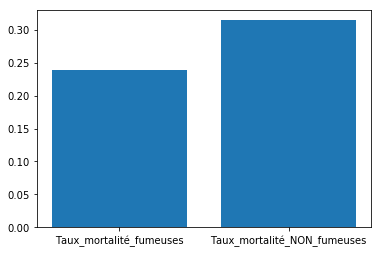

In [5]:
plt.bar(["Taux_mortalité_fumeuses","Taux_mortalité_NON_fumeuses"],[Taux_mortalité_fumeuses,Taux_mortalité_NON_fumeuses])

Remarque : le taux de mortalité des femmes fumeuses est moins élevé.

## Analyse 2
la même analyse qu'auparavant, en tenant compte cette fois du paramètre "Age".

In [6]:
Age_1 = raw_data['Age'] < 35                                 # Age_1 = 18-34 ans
Age_2 = (raw_data['Age'] < 55) & (raw_data['Age'] > 34)      # Age_2 = 35-54 ans
Age_3 = (raw_data['Age'] < 65) & (raw_data['Age'] > 54)      # Age_3 = 55-64 ans
Age_4 = raw_data['Age'] > 64                                 # Age_4 = plus de 65 ans

Totals_2 = [[0]*4]
for row in range(0,7):
    Totals_2.append([0]*4)
    
for i in range(0,4):
    AGE = "Age_"+str(int(i+1))
    Totals_2[i][0] = "Yes"; Totals_2[i+4][0] = "No"
    Totals_2[i][1] = AGE; Totals_2[i+4][1] = AGE
    
""" Alive smokers"""    
Totals_2[0][2] = SA[Age_1].size; Totals_2[1][2] = SA[Age_2].size
Totals_2[2][2] = SA[Age_3].size; Totals_2[3][2] = SA[Age_4].size

""" Dead smokers""" 
Totals_2[4][2] = SD[Age_1].size; Totals_2[5][2] = SD[Age_2].size
Totals_2[6][2] = SD[Age_3].size; Totals_2[7][2] = SD[Age_4].size

""" Alive NON_smokers"""    
Totals_2[0][3] = NSA[Age_1].size; Totals_2[1][3] = NSA[Age_2].size
Totals_2[2][3] = NSA[Age_3].size; Totals_2[3][3] = NSA[Age_4].size

""" Dead NON_smokers""" 
Totals_2[4][3] = NSD[Age_1].size; Totals_2[5][3] = NSD[Age_2].size
Totals_2[6][3] = NSD[Age_3].size; Totals_2[7][3] = NSD[Age_4].size

Table_2 = pd.DataFrame(data=Totals_2, columns=["Smoker","Age class","Alive", "Dead"])

Table_2

Smoker Age class  Alive  Dead
0    Yes     Age_1    546   663
1    Yes     Age_2    588   540
2    Yes     Age_3    192   243
3    Yes     Age_4     21    84
4     No     Age_1     21    18
5     No     Age_2    123    57
6     No     Age_3    153   120
7     No     Age_4    126   495

Remarque : 
* Age_1 = 18-34 ans
* Age_2 = 35-54 ans
* Age_3 = 55-64 ans
* Age_4 = plus de 65 ans.

Calcul de taux de mortalité.

In [7]:
Taux_Mortalité = np.zeros((8,1))
for i in range(0,8):
    Taux_Mortalité[i,0]= (Totals_2[i][3])/(Totals_2[i][3]+Totals_2[i][2])

Table_21 = Table_2[["Smoker","Age class"]]

Table_3 = pd.DataFrame(data=Taux_Mortalité, columns=["Taux_Mortalité"])
Table_3 = Table_21.join(Table_3)
Table_3 = Table_3.sort_values(by=["Age class"])
Table_3

Smoker Age class  Taux_Mortalité
0    Yes     Age_1        0.548387
4     No     Age_1        0.461538
1    Yes     Age_2        0.478723
5     No     Age_2        0.316667
2    Yes     Age_3        0.558621
6     No     Age_3        0.439560
3    Yes     Age_4        0.800000
7     No     Age_4        0.797101

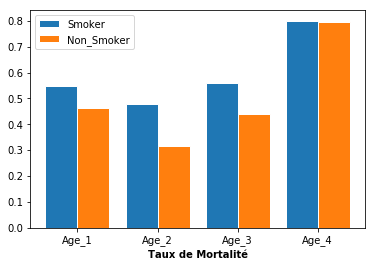

In [8]:
# set width of bar
barWidth = 0.4
 
# set height of bar
bars1=np.zeros((4,))
bars2=np.zeros((4,))

for i in range(0,4):
    bars1[i] = Table_3.iat[2*i,-1]
    bars2[i] = Table_3.iat[2*i+1,-1]
    
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r2, bars1, width=barWidth, edgecolor='white')
plt.bar(r3, bars2, width=barWidth, edgecolor='white')
 
# Add xticks on the middle of the group bars
plt.xlabel('Taux de Mortalité', fontweight='bold')
plt.xticks([r + barWidth*1.5 for r in range(len(bars1))], ['Age_1', 'Age_2', 'Age_3', 'Age_4'])
 
# Create legend & Show graphic
plt.legend(['Smoker','Non_Smoker'])
plt.show()


Remarque:

En tenant compte du paramètre "AGE", on constate que le tabagisme augmente le taux de mortalité des femmes. Cependant, nous ne pouvons pas voir cet impact des cigarettes pour les personnes âgées de 65 ans et plus. Cette étude montre que le fait de négliger un paramètre dans une étude peut biaiser l'analyse.